#  PreProcessing of Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df = dataset.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#dataset[dataset['Gender']=='Male'].count()

In [9]:
#dataset[dataset['Gender']=='Female'].count()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 10000 artists>

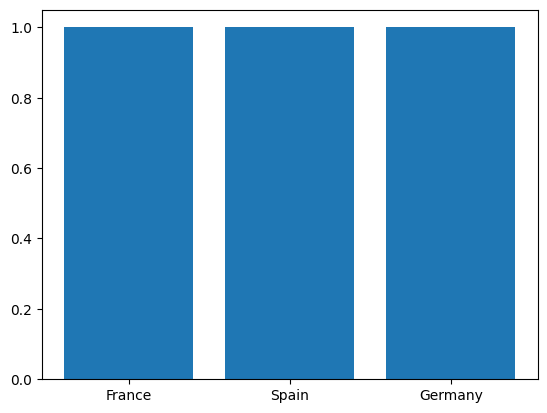

In [11]:
plt.bar(df['Geography'], df['Exited'])

<Axes: xlabel='CreditScore', ylabel='count'>

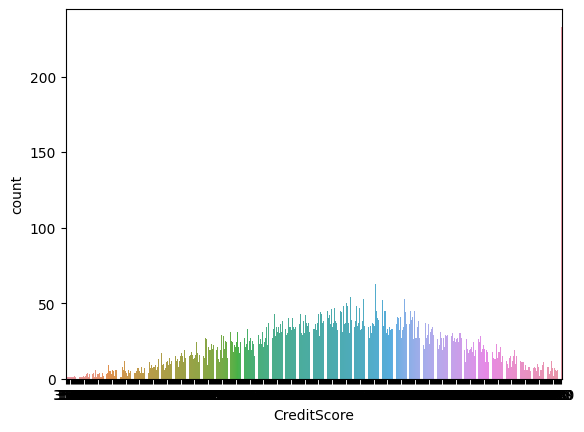

In [12]:
sns.countplot(x ='CreditScore', data = df)

<Axes: xlabel='Exited', ylabel='count'>

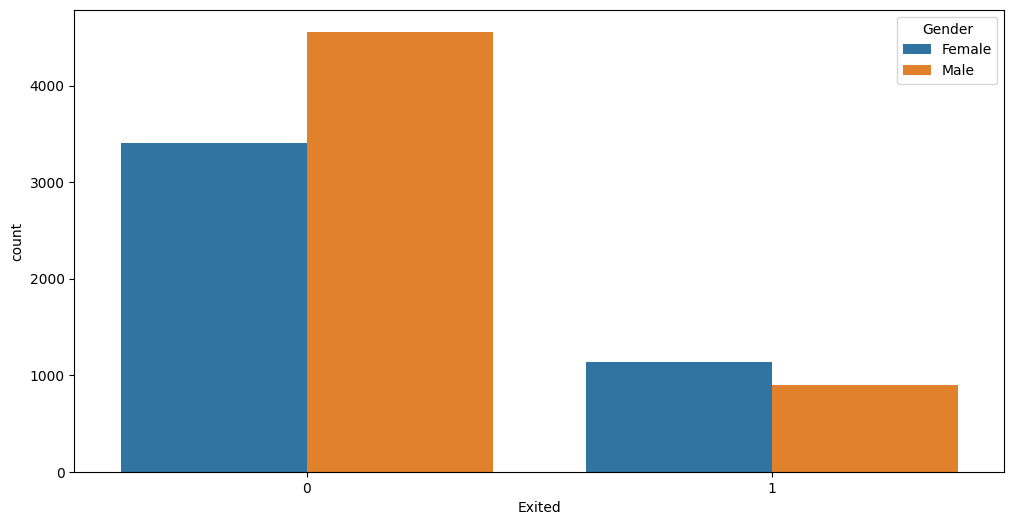

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='Exited', hue='Gender', data = df)

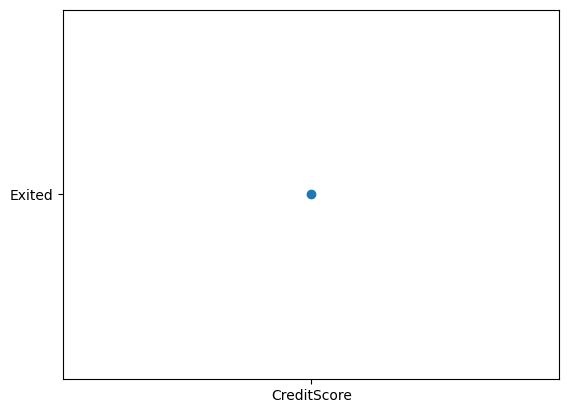

In [14]:
x = df['CreditScore']
y = df['Exited']
plt.scatter(x='CreditScore', y ='Exited')

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Preprocessing**

In [30]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [31]:
x,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 0]))

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])

In [34]:
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

# **Feature Selection**

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **Artificial Neural Network**(ANN)

In [38]:
import tensorflow as tf

In [39]:
tf.__version__

'2.13.0'

# **Initialize ANN**

In [42]:
ann = tf.keras.models.Sequential()

# **Adding first hidden layer**

In [43]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

# **Adding second hidden layer**

In [44]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

# **Adding the third hidden layer**

In [45]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# **Compile ANN**

In [50]:
ann.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

# **Training the ANN on the training set**

In [51]:
ann.fit(x_train, y_train, batch_size=32, epochs=5) # 32 rows at a time for 5 times.(forward and backward propogate)

Epoch 1/5
250/250 [==============================] - 1s 2ms/step - loss: 0.5892 - accuracy: 0.6946
Epoch 2/5
250/250 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7960
Epoch 3/5
250/250 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.7966
Epoch 4/5
250/250 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8029
Epoch 5/5
250/250 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8094


In [56]:
ann.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8627
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8631
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8627
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8639
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8640
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8636
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8636
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8635
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8634
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8655